In [10]:
import numpy as np
from scipy.io import netcdf

import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

## Geographically visualise datapoints

In [5]:
# read data from netcdf files

file2read_2015 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2015.nc','r')
file2read_2016 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2016.nc','r')
file2read_2017 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2017.nc','r')
file2read_2018 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2018.nc','r')
file2read_2019 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2019.nc','r')

temp_2015 = file2read_2015.variables["dis24"]
temp_2016 = file2read_2016.variables["dis24"]
temp_2017 = file2read_2017.variables["dis24"]
temp_2018 = file2read_2018.variables["dis24"]
temp_2019 = file2read_2019.variables["dis24"]

/var/folders/88/dz760h_j197bwmcvghz9mrkh0000gn/T/ipykernel_64108/2496670625.py:3: DeprecationWarning: `scipy.io.netcdf.NetCDFFile` is deprecated along with the `scipy.io.netcdf` namespace. `scipy.io.netcdf.NetCDFFile` will be removed in SciPy 1.14.0, and the `scipy.io.netcdf` namespace will be removed in SciPy 2.0.0.
  file2read_2015 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2015.nc','r')
/var/folders/88/dz760h_j197bwmcvghz9mrkh0000gn/T/ipykernel_64108/2496670625.py:4: DeprecationWarning: `scipy.io.netcdf.NetCDFFile` is deprecated along with the `scipy.io.netcdf` namespace. `scipy.io.netcdf.NetCDFFile` will be removed in SciPy 1.14.0, and the `scipy.io.netcdf` namespace will be removed in SciPy 2.0.0.
  file2read_2016 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2016.nc','r')
/var/folders/88/dz760h_j197bwmcvghz9mrkh0000gn/T/ipykernel_64108/2496670625.py:5: DeprecationWarning: `scipy.io.netcdf.NetCDFFile` is deprecated along with the `scipy.io.netcdf` namespace.

In [6]:
# select longitude and latitude
lon_values = file2read_2015.variables["lon"][:]
lat_values = file2read_2015.variables["lat"][:]

In [7]:
# preprocessing

data_2015 = temp_2015[:]*1
data_2016 = temp_2016[:]*1
data_2017 = temp_2017[:]*1
data_2018 = temp_2018[:]*1
data_2019 = temp_2019[:]*1

data_2015[data_2015==1e20] = np.nan
data_2016[data_2016==1e20] = np.nan
data_2017[data_2017==1e20] = np.nan
data_2018[data_2018==1e20] = np.nan
data_2019[data_2019==1e20] = np.nan

## just 2015

In [74]:
import xarray as xr

# Open the netCDF file using xarray
data_2015 = xr.open_dataset('../data/yearly_discharge/discharge_2015.nc')

# Convert the xarray Dataset to a pandas DataFrame
df = data_2015.to_dataframe()

# Reset the index to flatten the multi-index DataFrame
df.reset_index(inplace=True)

# drop missing
df.replace(1e20, np.nan, inplace=True)
df.dropna(inplace=True)

to_plot = df[df['time']=='2015-01-01']

to_plot

,time,lon,lat,dis24
0,2015-01-01,60.05,37.95,0.000119
1,2015-01-01,60.05,37.85,0.001098
2,2015-01-01,60.05,37.75,0.000071
3,2015-01-01,60.05,37.65,0.000046
4,2015-01-01,60.05,37.55,0.000217
...,...,...,...,...
123995,2015-01-01,99.95,7.45,9.600554
123996,2015-01-01,99.95,7.35,4.929910
123997,2015-01-01,99.95,7.25,3.744672
123998,2015-01-01,99.95,7.15,7.509447


#### map

In [76]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(to_plot['lon'], to_plot['lat'])]

geo_df = gpd.GeoDataFrame(to_plot, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/Users/smart/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,time,lon,lat,dis24,geometry
0,2015-01-01,60.05,37.95,0.000119,POINT (60.05000 37.95000)
1,2015-01-01,60.05,37.85,0.001098,POINT (60.05000 37.85000)
2,2015-01-01,60.05,37.75,0.000071,POINT (60.05000 37.75000)
3,2015-01-01,60.05,37.65,0.000046,POINT (60.05000 37.65000)
4,2015-01-01,60.05,37.55,0.000217,POINT (60.05000 37.55000)


<Axes: >

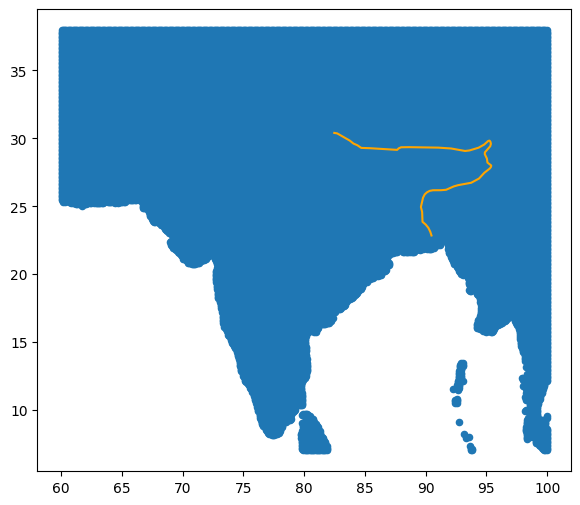

In [79]:
fig, ax = plt.subplots(figsize=(13,6))

river_map = gpd.read_file('../data/centerlines_data/ne_110m_rivers_lake_centerlines.shp')
brahmaputra = river_map[river_map['name'] == 'Brahmaputra']

geo_df.plot(ax=ax, markersize=20, marker='o')
brahmaputra.plot(ax=ax, color='orange')

/Users/smart/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


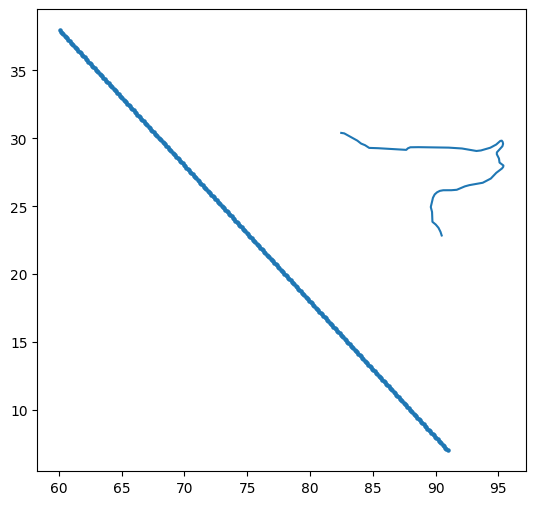

In [51]:
river_map = gpd.read_file('../data/centerlines_data/ne_110m_rivers_lake_centerlines.shp')
brahmaputra = river_map[river_map['name'] == 'Brahmaputra']

# basins = gpd.read_file('../data/world_basins/Major_Basins_of_the_World.shp')
# print(basins.head())

fig, ax = plt.subplots(figsize=(15,6))
brahmaputra.plot(ax=ax)

gdf.crs = {'init': 'epsg:4326'}
gdf.plot(ax=ax, markersize=5, label='Pos');

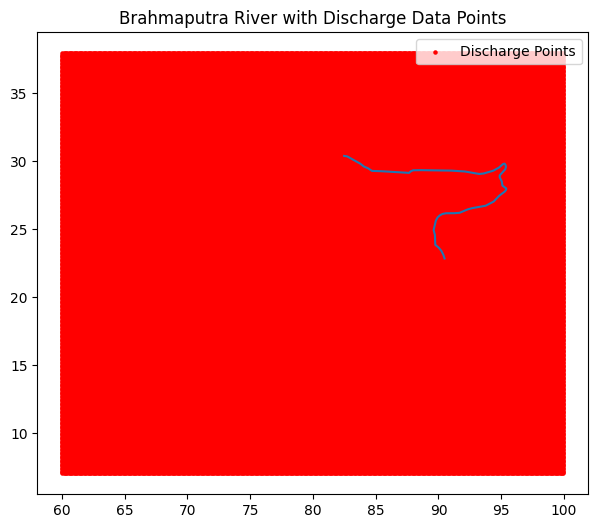

In [65]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt

# Load river map
river_map = gpd.read_file('../data/centerlines_data/ne_110m_rivers_lake_centerlines.shp')
brahmaputra = river_map[river_map['name'] == 'Brahmaputra']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot Brahmaputra river
brahmaputra.plot(ax=ax)

# Flatten lon and lat arrays
valid_lon_values_flat = valid_lon_values.flatten()
valid_lat_values_flat = valid_lat_values.flatten()

# Create DataFrame with valid lon and lat values
df = pd.DataFrame({'lon': valid_lon_values_flat, 'lat': valid_lat_values_flat})

# drop missing
df.replace(1e20, np.nan, inplace=True)
df.dropna(inplace=True)

# Create GeoDataFrame with geometry column
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(geometry, columns=['geometry'], crs=river_map.crs)

# Plot discharge data on top of the river map
gdf.plot(ax=ax, markersize=5, color='red', label='Discharge Points')

# Set plot title and legend
plt.title('Brahmaputra River with Discharge Data Points')
plt.legend()

# Show plot
plt.show()


In [68]:
df

,lon,lat
0,60.05,37.95
1,60.15,37.95
2,60.25,37.95
3,60.35,37.95
4,60.45,37.95
...,...,...
123995,99.55,7.05
123996,99.65,7.05
123997,99.75,7.05
123998,99.85,7.05


In [67]:
gdf

,geometry
0,POINT (60.05000 37.95000)
1,POINT (60.15000 37.95000)
2,POINT (60.25000 37.95000)
3,POINT (60.35000 37.95000)
4,POINT (60.45000 37.95000)
...,...
123995,POINT (99.55000 7.05000)
123996,POINT (99.65000 7.05000)
123997,POINT (99.75000 7.05000)
123998,POINT (99.85000 7.05000)
